<a href="https://colab.research.google.com/github/OlyaSto/Olyabmstu/blob/master/%D0%A2%D0%9C%D0%9E/%D0%9B%D0%A05/LR5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторная работа №5




Цель лабораторной работы: изучение ансамблей моделей машинного обучения.

Задание:
1. Выберите набор данных (датасет) для решения задачи классификации или регресии.

2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.

3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.

4. Обучите следующие ансамблевые модели:

*   одну из моделей группы бэггинга (бэггинг или случайный лес или сверхслучайные деревья);
*   одну из моделей группы бустинга;
*   одну из моделей группы стекинга.






## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

## Загрузка данных

Монтирование Google Drive для получения доступа к данным, лежащим на нем:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Загрузка данных:

In [3]:
filename = '/content/drive/MyDrive/ford.csv'

In [4]:
df = pd.read_csv(filename, sep=',')

In [5]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


В качестве датасета будем использовать набор данных, содержащий данные для прогназирования цен на разные модели машин марки Ford. https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction

Датасет содержит следующие атрибуты:

1. model - > Ford Car Brands - Модели машин марки Ford
2. year - >Production Year - Год выпуска
3. price - >Price of car in $ - Цена машины в долларах
4. transmission - > Automatic,Manual, Semi-Auto - Тип коробки передач: автоматическая, ручная, полуавтоматическая
5. mileage -> Number of miles traveled - Количество пройденных миль
6. fuel_Type -> Petrol,Diesel,Hybrid,Electric,Other - Тип топлива: бензин, дизель, гибрид, электричество, другое
7. tax -> Annual Tax - Ежегодный налог
8. mpg - > Miles per Gallon - Милли на галон
9. engineSize - > Car's Engine Size - Размер двигателя автомобиля

In [6]:
df.shape

(17966, 9)

In [7]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

## Обработка данных

Кодирование категориальных признаков

Категориальные данные находятся в столбцах "model", "fuelType", "transmission". Для кодирования этих столбцов будем использовать LabelEncoder:

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
#model
lemanum = LabelEncoder()
lemanumarr = lemanum.fit_transform(df["model"])
df["model"] = lemanumarr
df = df.astype({"model":"float"})

#transmission
lemot = LabelEncoder()
lemotarr = lemot.fit_transform(df["transmission"])
df["transmission"] = lemotarr
df = df.astype({"transmission":"float"})

#fuelType
lemof = LabelEncoder()
lemofarr = lemof.fit_transform(df["fuelType"])
df["fuelType"] = lemofarr
df = df.astype({"fuelType":"float"})

Выведем новые уникальные значения

In [10]:
np.unique(lemanumarr), np.unique(lemotarr), np.unique(lemofarr)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), array([0, 1, 2]), array([0, 1, 2, 3, 4]))

Выведем обновленную таблицу

In [11]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5.0,2017,12000,0.0,15944,4.0,150,57.7,1.0
1,6.0,2018,14000,1.0,9083,4.0,150,57.7,1.0
2,6.0,2017,13000,1.0,12456,4.0,150,57.7,1.0
3,5.0,2019,17500,1.0,10460,4.0,145,40.3,1.5
4,5.0,2019,16500,0.0,1482,4.0,145,48.7,1.0


## Разделение выборки на обучающую и тестовую

Разделим выборку с помощью функции train_test_split:

In [12]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df, df.	model, random_state=1)

In [47]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13474, 9), (13474,), (4492, 9), (4492,))

## Обучение моделей

### Модель бэггинга

In [48]:
from sklearn.ensemble import BaggingRegressor

In [54]:
bagging_model = BaggingRegressor(n_estimators=5, oob_score=True, random_state=10) #обучение на 5 деревьях
bagging_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:1164: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "


BaggingRegressor(n_estimators=5, oob_score=True, random_state=10)

Сконвертируем объекты, которые были использованы в обучающей выборке каждого дерева, в двоичную матрицу (1 соответствует элементам, попавшим в обучающую выборку):

In [55]:
bin_array = np.zeros((5, X_train.shape[0]))
for i in range(5):
    for j in bagging_model.estimators_samples_[i]:
        bin_array[i][j] = 1
bin_array

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 1.],
       [1., 1., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 1., 0.]])

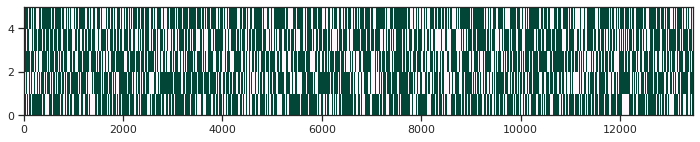

In [56]:
fig, ax = plt.subplots(figsize=(12,2))
ax.pcolor(bin_array, cmap='PuBuGn')
plt.show()

Оценим Out-of-bag error (теоретическое значение = 37%) - несмещенную оценку ошибки набора тестов:

In [57]:
for i in range(5):
    cur_data = bin_array[i]
    len_cur_data = len(cur_data)
    sum_cur_data = sum(cur_data)
    (len(bin_array[0]) - sum(bin_array[0])) / len(bin_array[0])
    oob_i = (len_cur_data - sum_cur_data) / len_cur_data
    print('Для модели {} размер OOB составляет {}%'.format(i+1, round(oob_i, 4)*100.0))

Для модели 1 размер OOB составляет 36.76%
Для модели 2 размер OOB составляет 36.5%
Для модели 3 размер OOB составляет 37.0%
Для модели 4 размер OOB составляет 36.79%
Для модели 5 размер OOB составляет 36.620000000000005%


Визуализируем обученные деревья:

In [58]:
from io import StringIO 
from IPython.display import Image
import graphviz
import pydotplus
from sklearn.tree import export_graphviz

In [60]:
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

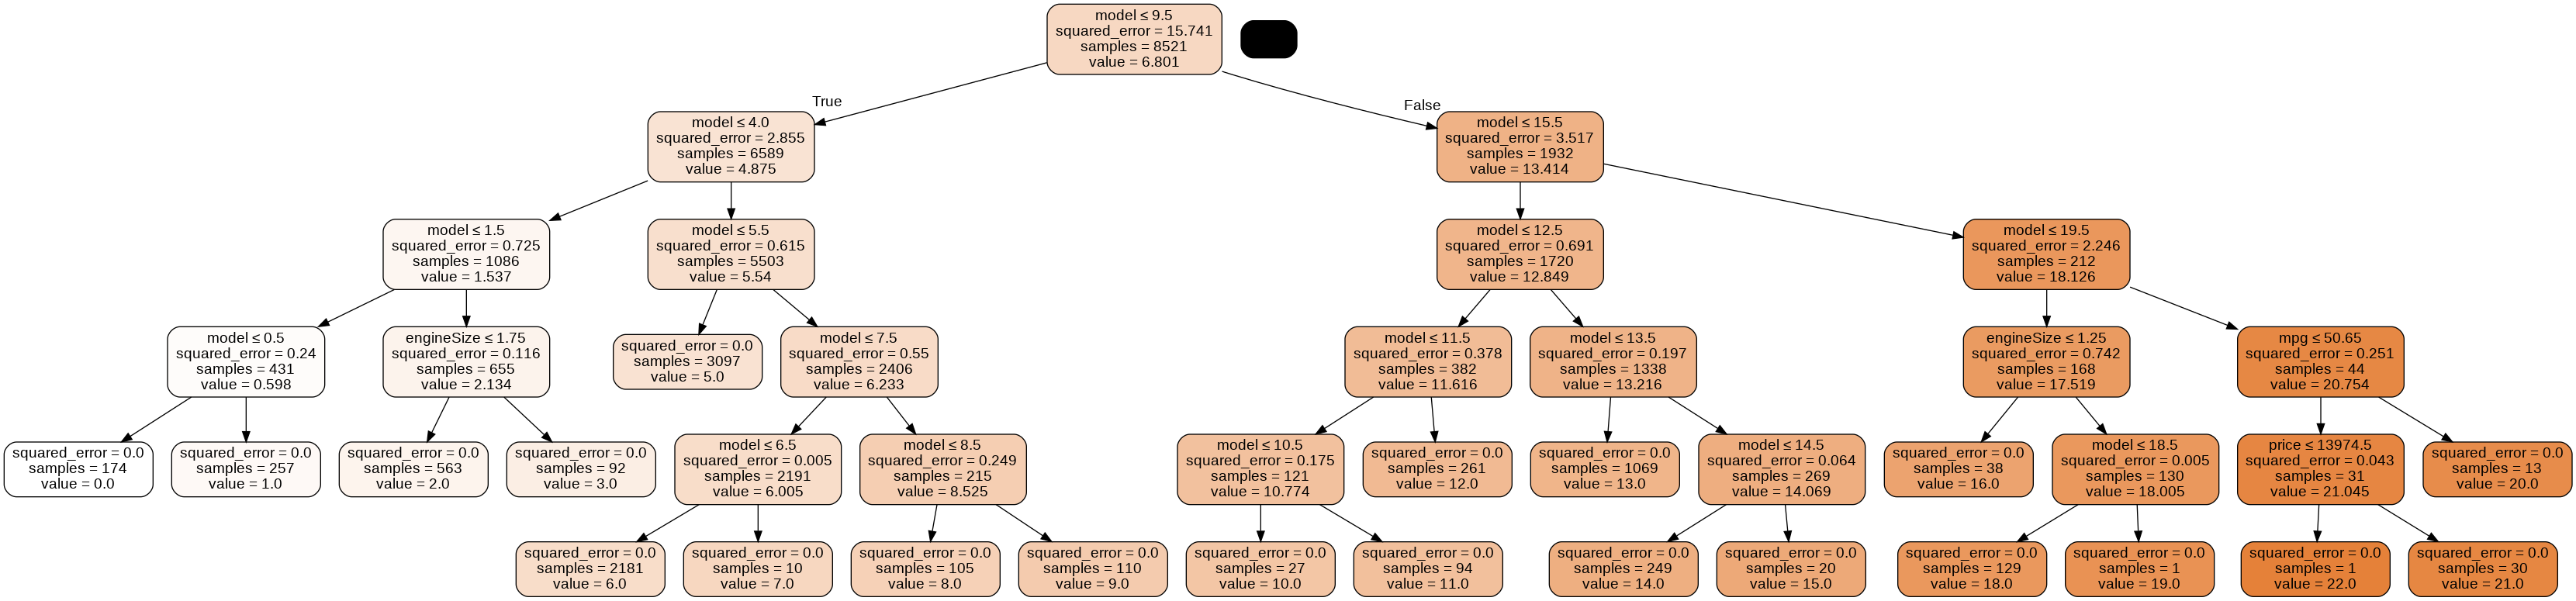

In [61]:
Image(get_png_tree(bagging_model.estimators_[0], df.columns))

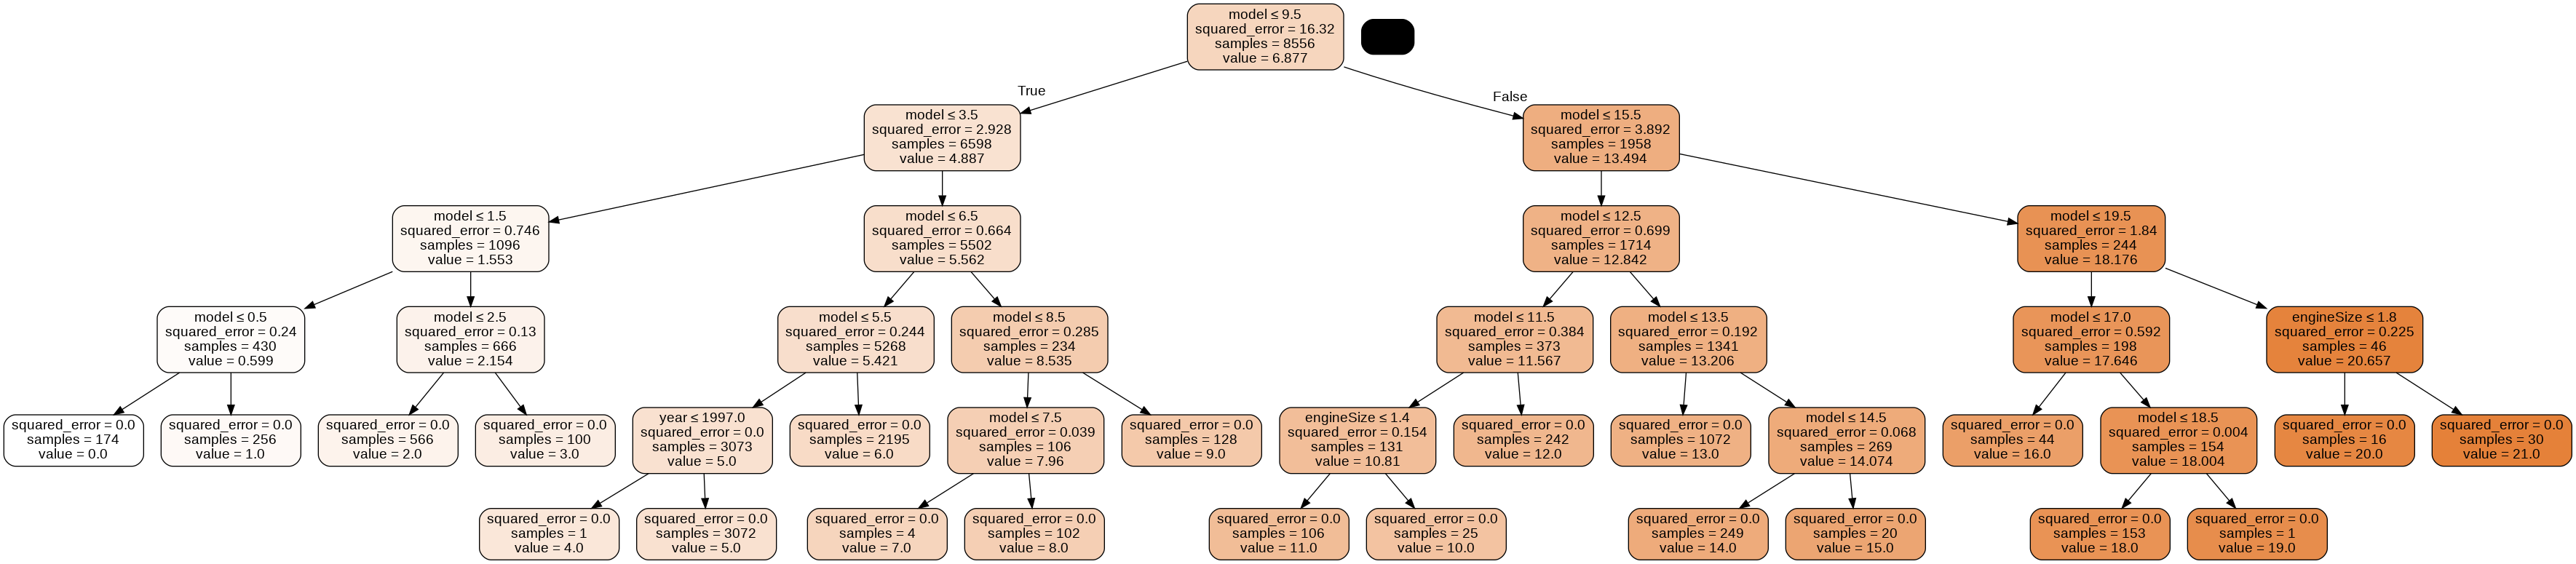

In [63]:
Image(get_png_tree(bagging_model.estimators_[1], df.columns))

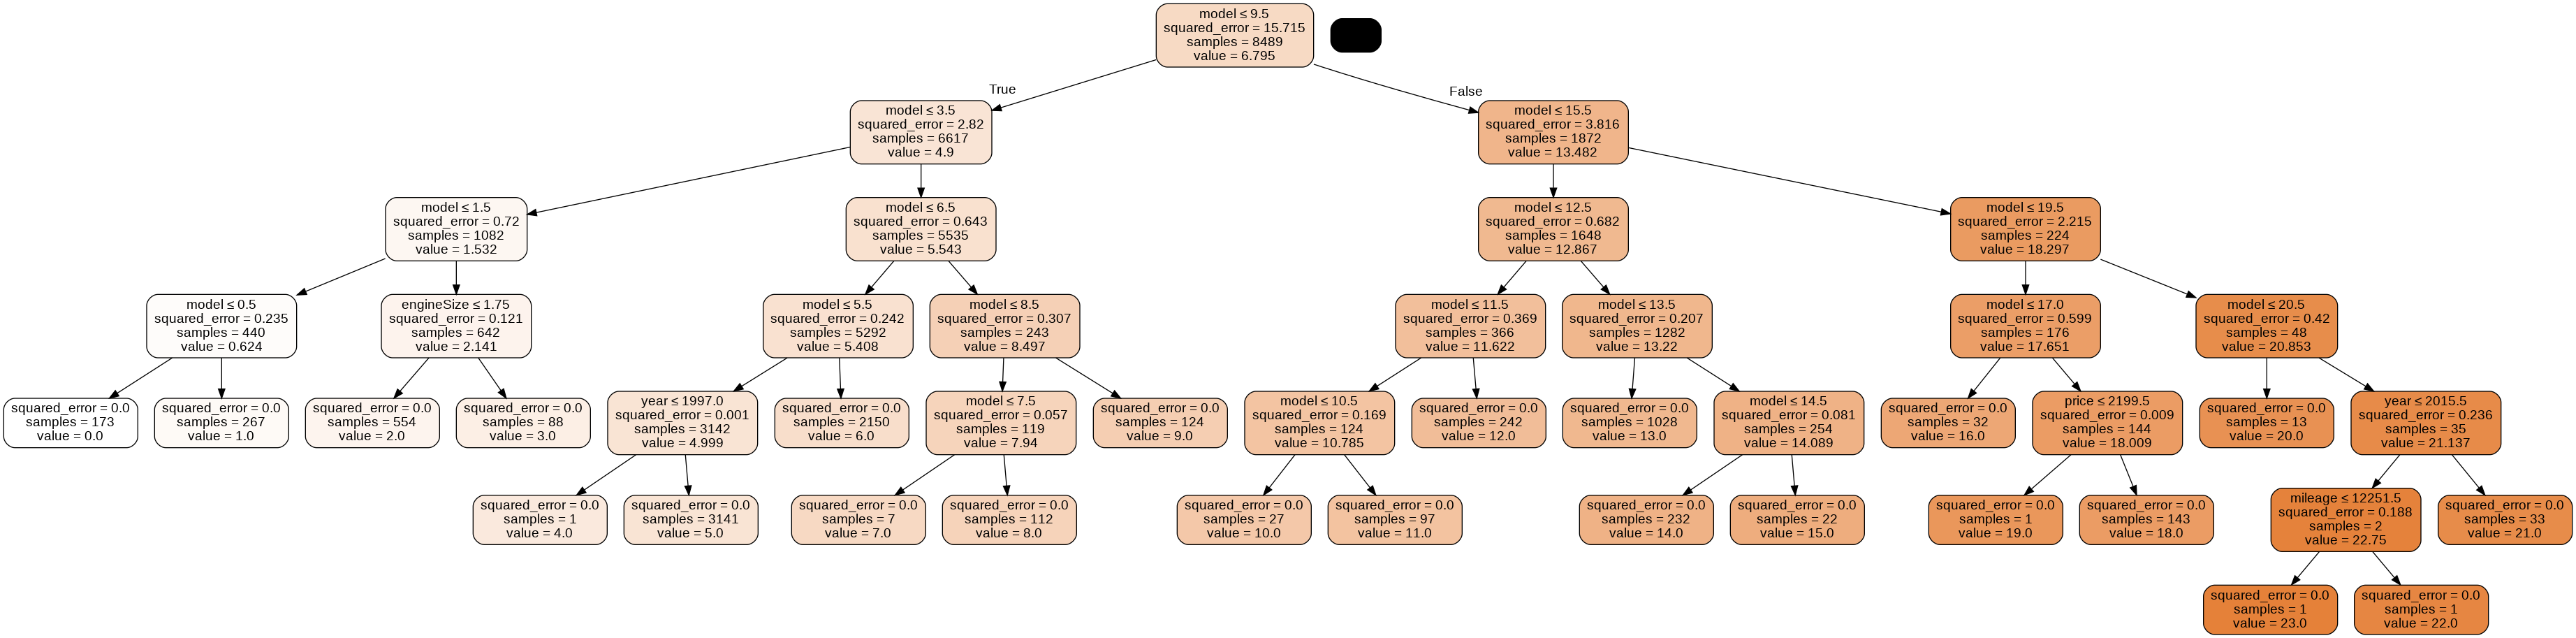

In [65]:
Image(get_png_tree(bagging_model.estimators_[2], df.columns))

Визуализируем результаты регрессии:

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
X = df.drop("transmission", axis=1)
y = df["transmission"]

In [66]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(X2, y)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = X2[:, 0], X2[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('year')
    ax.set_ylabel('engineSize')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

In [67]:
X2 = X[['year', 'engineSize']].to_numpy()

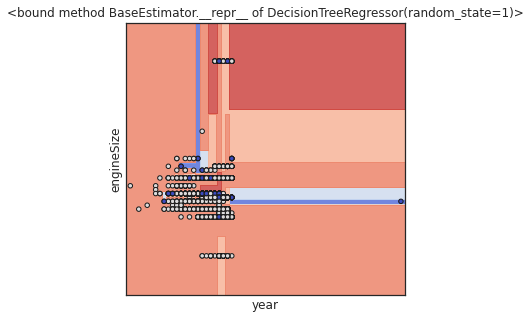

In [68]:
plot_cl(DecisionTreeRegressor(random_state=1))

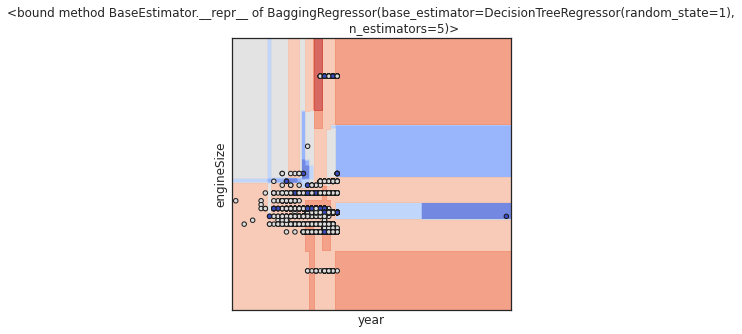

In [69]:
plot_cl(BaggingRegressor(DecisionTreeRegressor(random_state=1), n_estimators=5))

## Модель градиентного бустинга

In [45]:
from sklearn.ensemble import GradientBoostingRegressor


Обучим модель на 5 деревьях:

In [70]:
gradient_model = GradientBoostingRegressor(n_estimators=5)
gradient_model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=5)

Для визуализации регрессии будем использовать функцию plot_cl из визуализации регрессии модели бэггинга:

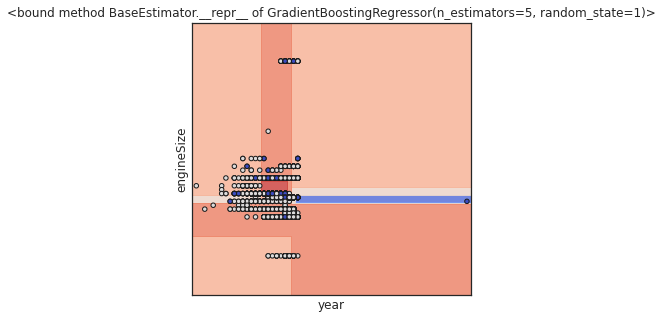

In [71]:

plot_cl(GradientBoostingRegressor(random_state=1, n_estimators=5))

## Модель стекинга

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

Реализуем модель стекинга через библиотеку heamy:

In [75]:
!pip install heamy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for heamy: filename=heamy-0.0.7-py2.py3-none-any.whl size=15366 sha256=f7c7a1d6fe27679bf23950d4614ce141e94dbefee3679226d3155e7ca8a19b96
  Stored in directory: /root/.cache/pip/wheels/f5/6c/da/55718ad26a9c8d3528b50edc2676fb33b0fb2e2b04e54cc882
Successfully built heamy


In [76]:
from heamy.estimator import Regressor
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset

In [77]:
dataset = Dataset(X_train, y_train, X_test)

Построим модели дерева, линейную модель и случайного леса для задачи регрессии:

In [78]:
model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, name='tree')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, parameters={'normalize': True}, name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'n_estimators': 5}, name='rf')

Определим их качество:

In [79]:
from sklearn.metrics import mean_absolute_error

In [80]:
def val_mae(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = mean_absolute_error(y_test, y_pred)
    print(model)
    print("MAE = {}".format(result))

In [81]:
for model in [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=5)
]:
    val_mae(model)
    print()

LinearRegression()
MAE = 1.3890305442822745e-14

DecisionTreeRegressor()
MAE = 0.0004452359750667854

RandomForestRegressor(n_estimators=5)
MAE = 0.0006678539626001779



## Оценка качества полученных моделей

Для оценки качества полученных моделей будем использовать метрику "Средняя абсолютная ошибка" (mean_absolute_error).

In [82]:
mean_absolute_error(y_test, bagging_model.predict(X_test))

0.0005788067675868198

In [83]:
mean_absolute_error(y_test, gradient_model.predict(X_test))

1.852131143498414

In [85]:
results = model_tree.validate(k=10, scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [0.0, 0.0, 0.000741839762611276, 0.000741839762611276, 0.0, 0.0007423904974016332, 0.0, 0.0, 0.0, 0.0014847809948032665]
Mean accuracy: 0.00037108510174274514
Standard Deviation: 0.0004979286286797833
Variance: 2.479329192589295e-07


In [88]:
def vis_models_quality(array_metric, array_labels, str_header, figsize=(5, 5)):
    fig, ax1 = plt.subplots(figsize=figsize)
    pos = np.arange(len(array_metric))
    rects = ax1.barh(pos, array_metric,
                     align='center',
                     height=0.5, 
                     tick_label=array_labels)
    ax1.set_title(str_header)
    for a,b in zip(pos, array_metric):
        plt.text(0.2, a-0.1, str(round(b,3)), color='white')
    plt.show()

In [86]:
labels = ['Бэггинг','Бустинг', 'Стекинг']
mae = [0.0005788067675868198, 1.852131143498414, 0.00037108510174274514]

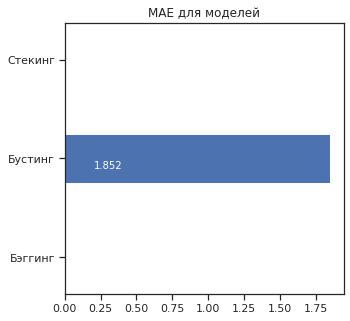

In [89]:
vis_models_quality(mae, labels, 'MAE для моделей')